In [1]:
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sys.path.append('/u4/surprise/YAD_STAGIN')
from dataset import DatasetHCPRest, DatasetYADRest
yad_ds = DatasetYADRest(resample=True)

[DatasetYADRest.__init__] YAD_schaefer400_sub19.pth is loaded.
[DatasetYADRest.__init__] YAD_schaefer400_sub19.pth is resampled.
[DatasetYADRest.__init__] /u4/surprise/YAD_STAGIN/data/behavior/labelled_modified.csv is loaded.
[DatasetYADRest.__init__] Done.


In [4]:
for i in range(len(yad_ds)):
    print(yad_ds[i]['timeseries'].shape)
    break

AttributeError: 'dict' object has no attribute 'shape'

In [22]:
min([ yad_ds.timeseries_dict[d].shape[-1] for d in yad_ds.timeseries_dict ])


200

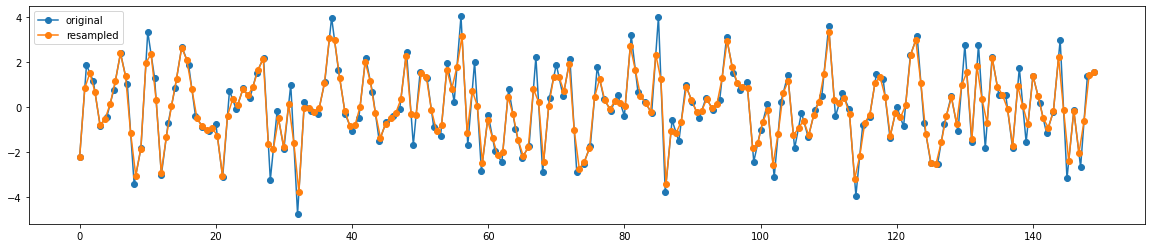

In [13]:
from tslearn.preprocessing import TimeSeriesResampler
from utils.yad_info import * 
index = 0
subject_id = yad_ds[index]['id']  
site = parse_yad_id(subject_id)
min_TR_site = min(TR_dict, key=TR_dict.get)
timepoints = yad_ds[index]['timeseries'].shape[-1]
resample_size = int(TR_dict[site]/TR_dict[min_TR_site] * timepoints)

ts = yad_ds[index]['timeseries'].numpy()
ts_resampled = TimeSeriesResampler(sz=resample_size).fit_transform(ts)
x = np.linspace(0, timepoints-1, timepoints)
x_resample = np.linspace(0, timepoints-1, resample_size)
plt.figure(figsize=(20,4))
plt.plot(x,ts[0], linestyle='-', marker='o', label='original')
plt.plot(x_resample,ts_resampled[0], linestyle='-', marker='o', label='resampled')
plt.legend()
plt.savefig("/u4/surprise/YAD_STAGIN/result/figs/upsampled.png", dpi=300)


In [17]:
# test on stationarity : ADF test
# https://www.analyticsvidhya.com/blog/2021/08/granger-causality-in-time-series-explained-using-chicken-and-egg-problem/
from statsmodels.tsa.stattools import adfuller
ts = pd.DataFrame(yad_ds[0]['timeseries'].numpy().T)
result = ts.apply(adfuller, axis=0)
#result = res.loc[1]<0.05
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')


Test Statistics: 0                                            -12.84734
1                                                  0.0
2                                                    0
3                                                  149
4    {'1%': -3.4750180242954167, '5%': -2.881140802...
5                                           455.503469
Name: 0, dtype: object
p-value: 0                                            -9.465733
1                                                  0.0
2                                                    0
3                                                  149
4    {'1%': -3.4750180242954167, '5%': -2.881140802...
5                                           346.026874
Name: 1, dtype: object
critical_values: 0                                           -11.992298
1                                                  0.0
2                                                    0
3                                                  149
4    {'1%': -3.4750180242954167

In [3]:
#http://nipy.org/nitime/examples/granger_fmri.html
import nitime
import nitime.analysis as nta
import nitime.timeseries as ts
import nitime.utils as tsu
from nitime.viz import drawmatrix_channels
f_lb, f_ub = 0.02, 0.15
pdata = yad_ds[0]['timeseries']
time_series = ts.TimeSeries(pdata, sampling_interval=1.5)
G = nta.GrangerAnalyzer(time_series, order=1)
freq_idx_G = np.where((G.frequencies > f_lb) * (G.frequencies < f_ub))[0]
C1 = nta.CoherenceAnalyzer(time_series)
C2 = nta.CorrelationAnalyzer(time_series)
freq_idx_C = np.where((C1.frequencies > f_lb) * (C1.frequencies < f_ub))[0]
coh = np.mean(C1.coherence[:, :, freq_idx_C], -1)  # Averaging on the last dimension
g1 = np.mean(G.causality_xy[:, :, freq_idx_G], -1)
fig01 = drawmatrix_channels(coh, size=[10., 10.], color_anchor=0)

NameError: name 'coh' is not defined